In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
from sklearn.datasets import make_moons
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import laplacian
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

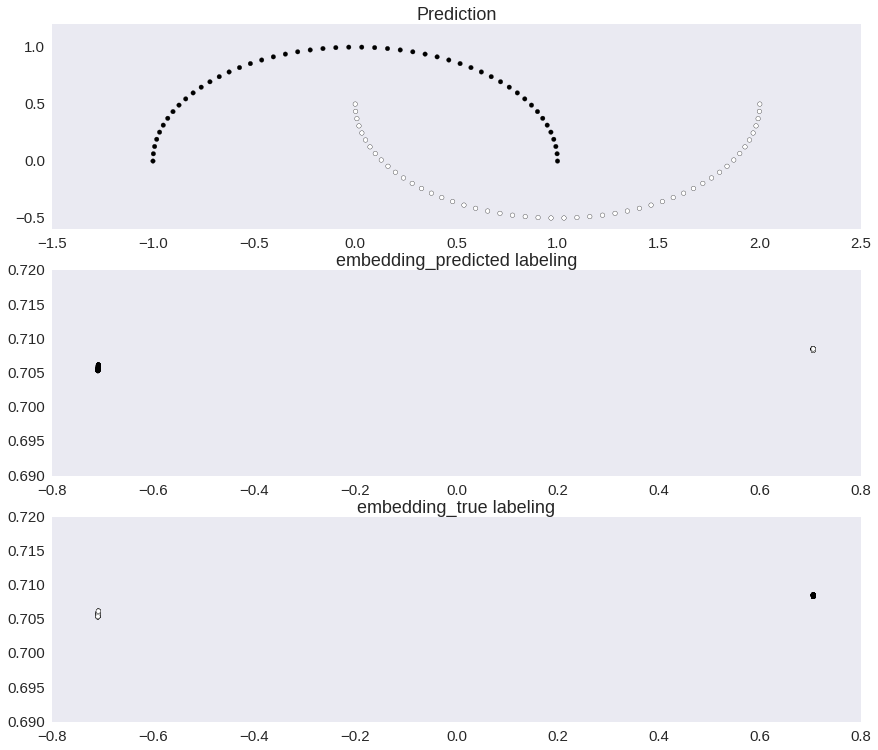

In [14]:
np.random.seed(0)
N_SAMPLE =100
N_NOISE = 0.0001
N_NOISE = 0.0001
neighbor =3
iteration = 1000
n_cluster =2
r=1.0
data_x, data_y =make_moons(n_samples=N_SAMPLE) #getMoon(n_sample=N_SAMPLE, noise=N_NOISE)#empricalData(n_sample=N_SAMPLE, noise=N_NOISE).getMoon()

adj_matrix = kneighbors_graph(data_x,n_neighbors= 3,include_self=False)
adj_matrix = 0.5*(adj_matrix+adj_matrix.T)
laplacianMatrix =laplacian(adj_matrix,normed=False)

#Initializaiton

# H=np.random.randn(X.shape[0],self.n_cluster)
H=np.arange(data_x.shape[0]*n_cluster).reshape(data_x.shape[0],n_cluster)
P = H
row,_ = H.shape
B = np.zeros(shape=H.shape)

for i in range(iteration):
    H_prev = H
    H = np.linalg.solve((laplacianMatrix+laplacianMatrix.T)+r*np.identity(n=row),r*(P-B))
    y_k = H + B
    u, d, v = np.linalg.svd(y_k, full_matrices=True)
    P = u.dot(np.eye(N=u.shape[1], M=v.shape[0])).dot(v)
    err = np.linalg.norm(H-H_prev)
    B = B + H - P
    if err<0.000005:
        print 'threshold meets %f'%err
        break

kmeans = KMeans(n_cluster)
pred = kmeans.fit_predict(H)
emb  = normalize(H)
fig,ax = plt.subplots(nrows=3,ncols=1)
fig.set_size_inches(14.5, 12.5)

ax[0].set_title('Prediction')
ax[0].scatter(data_x[:,0],data_x[:,1],c=pred)
ax[1].set_title('embedding_predicted labeling')
ax[1].scatter(emb[:,0],emb[:,1],c=pred)

ax[2].set_title('embedding_true labeling')
ax[2].scatter(emb[:, 0], emb[:, 1], c=data_y)

